# This exercise will correlate AUDTHB with other combinations of AUD, THB, USD and JPY currency pairs to see the influence of regional trading blocs...

# 1. Prepare the Data Set

In [26]:
import pandas as pd
import numpy as np
#import scipy as sp
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [27]:
# read in the csv file as a df, declaring null values, and initial look at the type of data and data types 
data1 = pd.read_csv('all_currency_pairs.csv', na_values=[' '])
# drop the null values from df
data1= pd.DataFrame(data1).dropna()
# do a df.describe to have a feel of the key stats of each currency pair 
#- counts, high, low, increase, decrease, anomalies
np.round(data1.describe(), 2)
print (data1.head())

       Date  AUDTHB  AUDJPY  AUDUSD  THBJPY  USDTHB  USDJPY
0  2-Jan-06  30.080   86.47  0.7331  2.8754  41.025  117.95
1  3-Jan-06  30.160   85.96  0.7398  2.8507  40.760  116.19
2  4-Jan-06  30.195   86.72  0.7478  2.8723  40.385  115.98
3  5-Jan-06  30.050   86.63  0.7475  2.8832  40.200  115.89
4  6-Jan-06  29.990   86.28  0.7541  2.8770  39.765  114.42


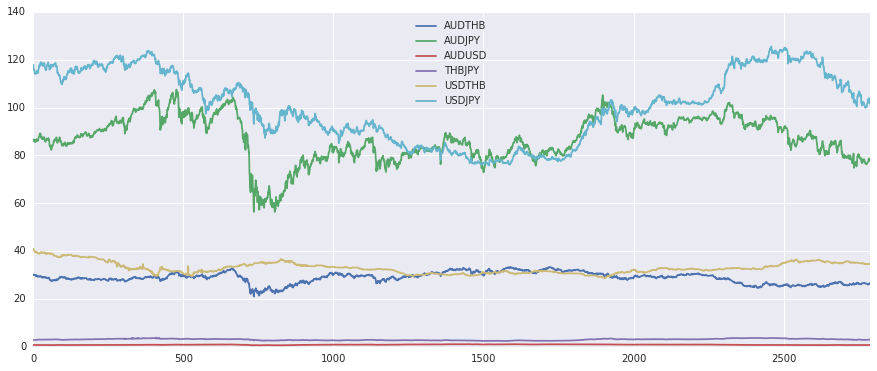

In [28]:
# try a numpy plot to compare the 6 time series pairs
data1.plot()
#print (data2.head())

* Observations:

1. looks okay, but the scale problem is obscuring the trends of the low range currency pairs, ie. US_AUD and US_THB
2. I can improve the chart by 'normalising' the currency pairs first

# 2.  Run Pearson Test and Build Heat Map

In [29]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [30]:
# DataFrames corr() function calculates pairwise correlations using specified 
# algorithm: 'peason, 'kendall', and 'spearman' are supported.
# Correlations are returned in a new DataFrame instance (corr_data1 below).
corr_data = data1.corr(method='pearson')
print("--------------- CURRENCY PAIRS CORRELATION MATRIX ---------------")
print(corr_data.head(len(data1)))

--------------- CURRENCY PAIRS CORRELATION MATRIX ---------------
          AUDTHB    AUDJPY    AUDUSD    THBJPY    USDTHB    USDJPY
AUDTHB  1.000000  0.324982  0.904801 -0.393204 -0.572754 -0.552115
AUDJPY  0.324982  1.000000  0.234446  0.736821 -0.234069  0.510160
AUDUSD  0.904801  0.234446  1.000000 -0.408834 -0.832943 -0.709598
THBJPY -0.393204  0.736821 -0.408834  1.000000  0.173804  0.886822
USDTHB -0.572754 -0.234069 -0.832943  0.173804  1.000000  0.583960
USDJPY -0.552115  0.510160 -0.709598  0.886822  0.583960  1.000000


--------------- CURRENCY PAIRS CORRELATION HEATMAP ---------------


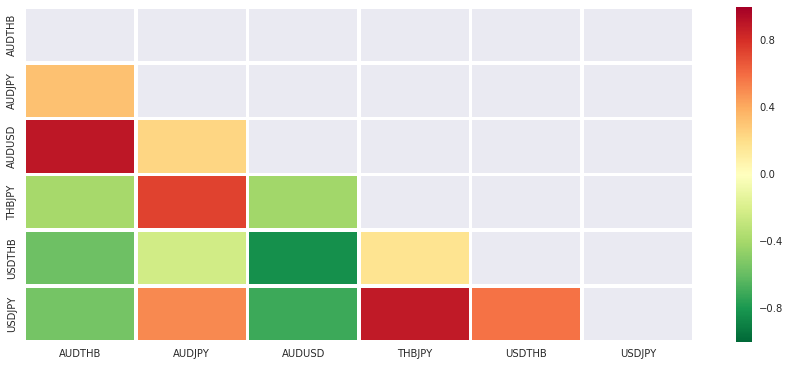

In [31]:
print("--------------- CURRENCY PAIRS CORRELATION HEATMAP ---------------")
# A mask is created to display only the lower triangle of the matrix, as it is mirrored diagonally.
map_mask = np.zeros_like(corr_data)
map_mask[np.triu_indices_from(map_mask)] = True
# Create the heatmap using seaborn library. 
# Colours chose from: http://matplotlib.org/examples/color/colormaps_reference.html
seaborn.heatmap(corr_data, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = map_mask, linewidths=2.5)

story:
1. AUDTHB is strongly influenced by AUDUSD and moderately by AUDJPY - which means AUD although in AsiaPac Bloc is more correlated with US events, ie. when AUDUSD goes up, AUDTHB also goes up... AUD is the stronger currency compared to THB.
2. THBJPY and AUDJPY are moderately correlated.. there is some influence of JPY on AUDTHB rate, confirming 1.
3. THBJPY is strongly influenced by USDJPY... again confirm a secondary impact of JPY on AUDTHB rates
4. USDTHB and AUDUSD are negatively correlated - which means price for one goes up, the other goes down...